In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

df = pd.read_csv("1_t.csv", index_col=0)

# 1. signal.butter () + signal.sosfilt

Text(0, 0.5, 'Amplitude')

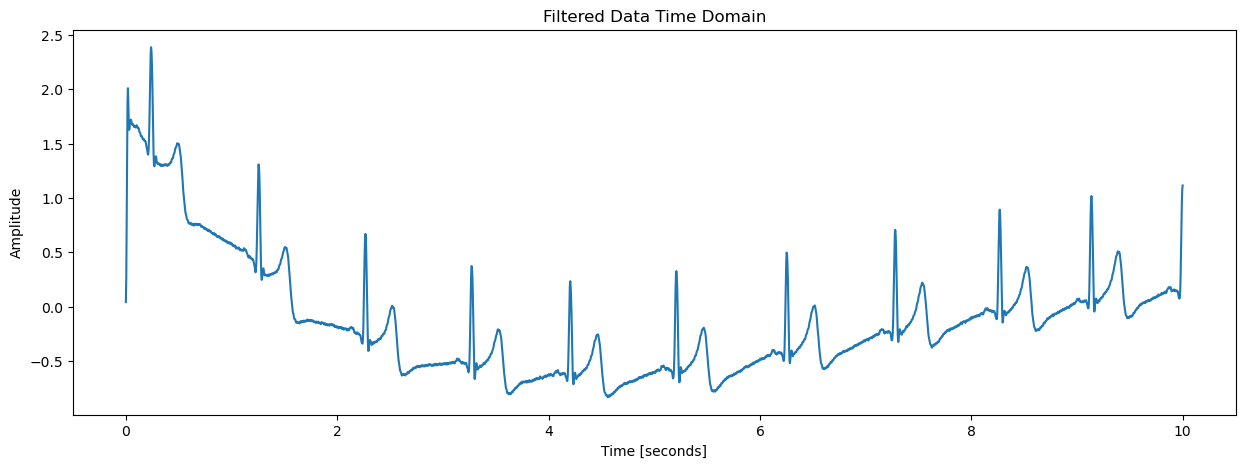

In [29]:
order= 4

fs = 256
t = np.linspace(0, 10, 2560)

# raw signal
sig = df["1"]

# filtered signal
sos = signal.butter(order, [0.05, 40], 'band', fs=fs, output='sos')
filtered = signal.sosfilt(sos, sig)


plt.figure(figsize=(15,5))
plt.plot(t, filtered)
plt.title('Filtered Data Time Domain')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude(mV)')

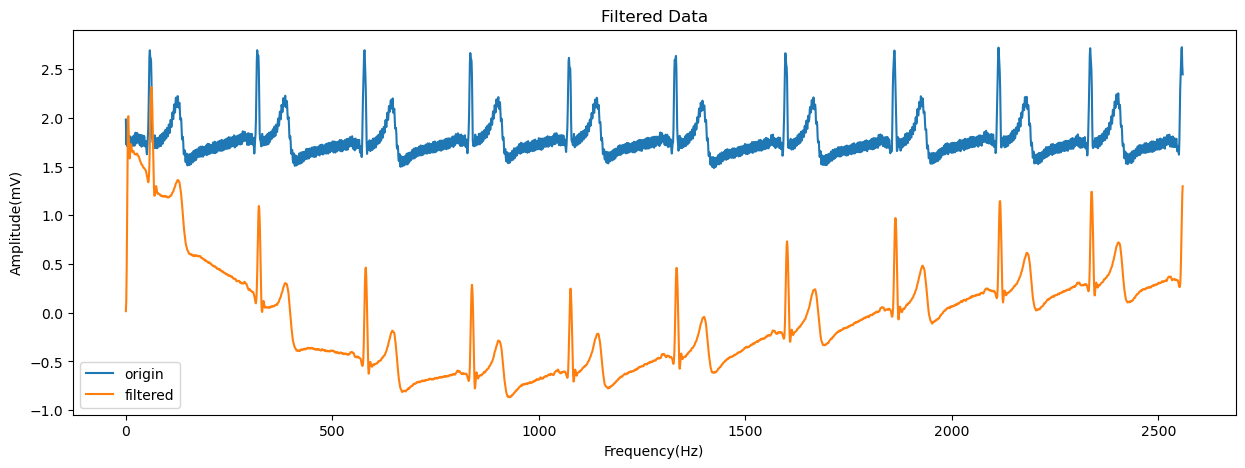

In [163]:
df = pd.read_csv("1.csv", index_col=0)

order= 5
fs = 256
t = np.arange(0,2560)
#t = np.linspace(0, 10, 2560)

# raw signal
sig = df["1"]

# filtered signal
sos = signal.butter(order, [0.05, 40], 'bandpass',analog = False, fs=fs, output='sos')
filtered = signal.sosfilt(sos, sig)


plt.figure(figsize=(15,5))
plt.plot(t,df["1"])
plt.plot(t, filtered)
plt.legend(['origin','filtered'])
plt.title('Filtered Data')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(mV)')

# 2. signal.ellip() + signal.sosfilt()
signal.ellip() 2,3번쨰 파라미터는 잘 모르겠음

Text(0, 0.5, 'Amplitude(mV)')

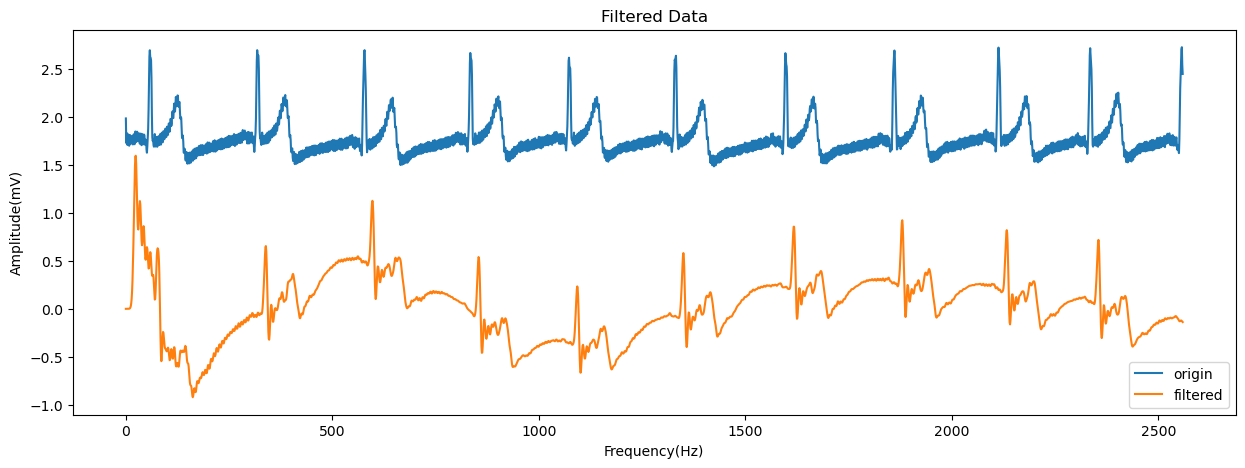

In [165]:
sos = signal.ellip(101, 1, 256, [0.05,40], 'band', fs=256, output='sos')
filtered = signal.sosfilt(sos, sig)


plt.figure(figsize=(15,5))
plt.plot(t,df["1"])
plt.plot(t, filtered)
plt.legend(['origin','filtered'])
plt.title('Filtered Data')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(mV)')

# 3. signal.firwin() + signal.lfilter()
signal.lfilter() 두번째 파라미터 변경시 y축 바뀜

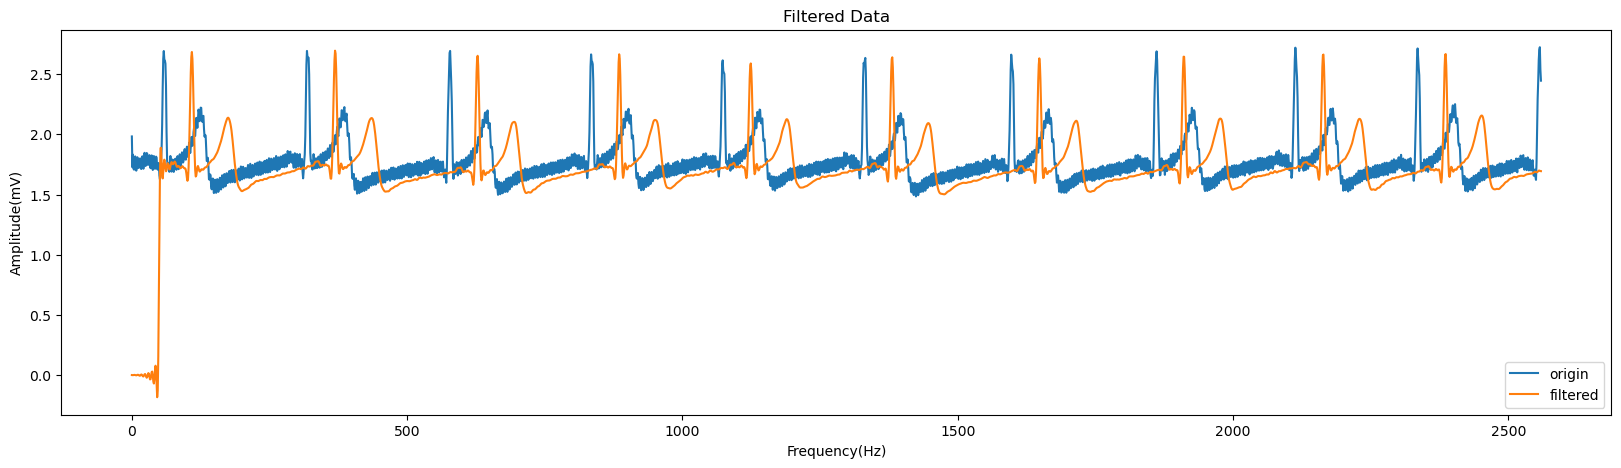

In [166]:
b = signal.firwin(101, [0.05,40], fs=256, pass_zero='bandpass')
x1 = signal.lfilter(b, 1, df["1"])

plt.figure(figsize=(20, 5))
plt.plot(df.index, df["1"])
plt.plot(df.index, x1)
plt.legend(['origin','filtered'])
plt.title('Filtered Data')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(mV)')
plt.show()